# Задание

Лабораторная работа № 1
«Проверка гипотезы о законе распределения генеральной совокупности»
В результате опыта была получена выборочная совокупность.
Задание:
1. Составить вариационный ряд.
2. Построить интервальный статистический ряд.
3. По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот,
4. Построить график эмпирической функции распределения.
5. Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию.
6. По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности.
7. Найти оценки параметров предполагаемого распределения генеральной совокупности.
8. Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x).
9. Проверить выполнение правила «трех сигма».
10. Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.
11. Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.

In [3]:
# Необходимые библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Список значений

list = np.array([41.7, 36.7, 45.6, 31.0, 38.9, 28.3, 23.7, 54.5, 31.6, 26.1, 50.4, 45.0, 53.5, 50.1, 29.7, 40.9, 32.4, 45.0, 35.6, 25.6, 55.3, 33.1, 25.6, 40.2, 32.2, 43.2, 25.1, 29.9, 52.7, 18.6, 35.3, 38.1, 29.4, 32.1, 43.0, 23.0, 34.1, 28.8, 31.6, 40.8, 32.7, 43.0, 41.7, 41.7, 28.3, 23.1, 18.2, 23.5, 30.3, 36.2, 34.9, 41.0, 54.3, 33.3, 39.3, 12.8, 20.6, 22.6, 26.1, 16.8])

In [5]:
# Пункт 1. Вариационный ряд

variation_list = np.sort(list)
print(variation_list)

[12.8 16.8 18.2 18.6 20.6 22.6 23.  23.1 23.5 23.7 25.1 25.6 25.6 26.1
 26.1 28.3 28.3 28.8 29.4 29.7 29.9 30.3 31.  31.6 31.6 32.1 32.2 32.4
 32.7 33.1 33.3 34.1 34.9 35.3 35.6 36.2 36.7 38.1 38.9 39.3 40.2 40.8
 40.9 41.  41.7 41.7 41.7 43.  43.  43.2 45.  45.  45.6 50.1 50.4 52.7
 53.5 54.3 54.5 55.3]


In [6]:
# Пункт 2. Интервальный статистический ряд

n = len(variation_list) # Количество элементов
k = int(np.ceil(1 + 3.322 * np.log10(n)))  # Вычисления количества интервалов при помощи формулы Стерджеса

frequencies, bin_edges = np.histogram(variation_list, bins=k) 

relative_frequencies = frequencies / n

interval_labels = [f"({round(bin_edges[i], 2)}, {round(bin_edges[i+1], 2)}]" for i in range(k)]

interval_data = [
    {"Интервал": interval_labels[i], "Частота": frequencies[i], "Относительная частота": relative_frequencies[i]}
    for i in range(k)
]

interval_df = pd.DataFrame(interval_data)
interval_df

,Интервал,Частота,Относительная частота
0,"(12.8, 18.87]",4,0.066667
1,"(18.87, 24.94]",6,0.100000
2,"(24.94, 31.01]",13,0.216667
3,"(31.01, 37.09]",14,0.233333
4,"(37.09, 43.16]",12,0.200000
5,"(43.16, 49.23]",4,0.066667
6,"(49.23, 55.3]",7,0.116667


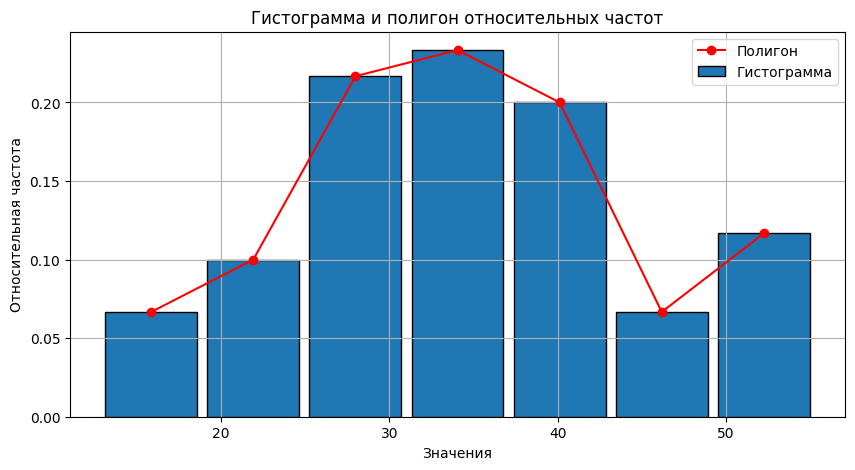

In [7]:
# Пункт 3. Полигон и гистограмма относительных частот

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:]) # Центры интервалов (для полигона)

plt.figure(figsize=(10, 5))

plt.bar(bin_centers, relative_frequencies, width=(bin_edges[1] - bin_edges[0]) * 0.9,
        align='center', edgecolor='black', label='Гистограмма')

plt.plot(bin_centers, relative_frequencies, marker='o', color='red', linestyle='-', label='Полигон')

plt.title('Гистограмма и полигон относительных частот')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.legend()
plt.show()


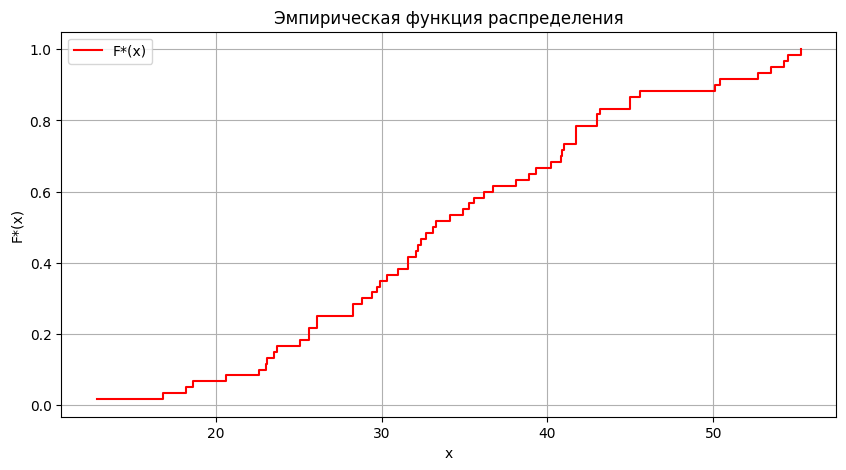

In [8]:
# Пункт 4. График эмпирической функции распределения

empirical_cdf = np.arange(1, n + 1) / n  # F*(x) = i / n

plt.figure(figsize=(10, 5))
plt.step(variation_list, empirical_cdf, where='post', label='F*(x)', color='red')
plt.title('Эмпирическая функция распределения')
plt.xlabel('x')
plt.ylabel('F*(x)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Пункт 5. Числовые характеристики выборки

mean = np.mean(variation_list) # Выборочное среднее
variance = np.var(variation_list, ddof=1) # Исправленная выборочная дисперсия
std = np.sqrt(variance) # Стандартное отклонение
median = np.median(variation_list)
mode = stats.mode(variation_list).mode
kurtosis = stats.kurtosis(variation_list)
skewness = stats.skew(variation_list)

characteristics = {
    "Выборочное среднее": mean,
    "Исправленная выборочная дисперсия": variance,
    "Стандартное отклонение": std,
    "Медиана": median,
    "Мода": mode,
    "Коэффициент асимметрии": skewness,
    "Эксцесс (избыточный)": kurtosis
}

characteristics_data = pd.DataFrame(characteristics.items(), columns=['Характеристика', 'Значение'])

Пункт 6.

Гистограмма имеет "колокообразную" форму, график эмперической функции распределения имеет форму S-образную. Учитывая числовые характеристики, где эксцесс близок к нулю, а также коэффициент асимметрии близок к нулю можно выдвинуть гипотезу, что распределение генеральной совокупности является нормальным. 

In [10]:
# Пункт 7.

mu = mean
sigma = std
print(f"Оценка математического ожидания (μ): {mu}", f"Оценка среднеквадратичного отклонения (σ): {sigma}", sep='\n')

Оценка математического ожидания (μ): 34.64666666666666
Оценка среднеквадратичного отклонения (σ): 10.189317547824068


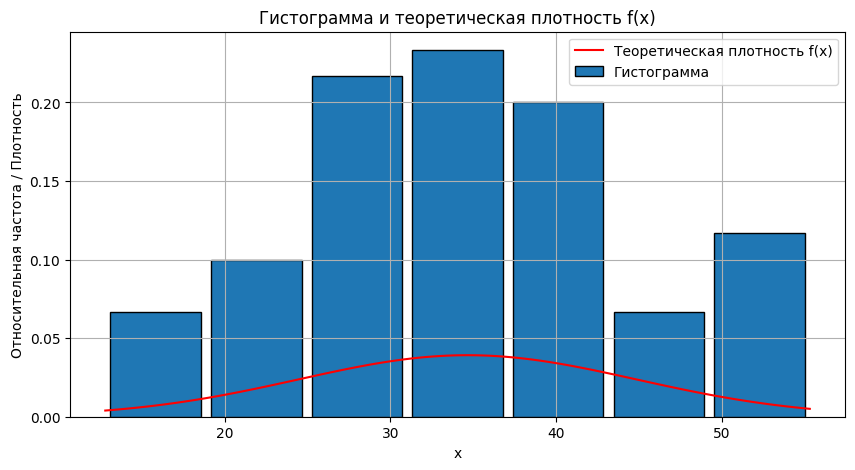

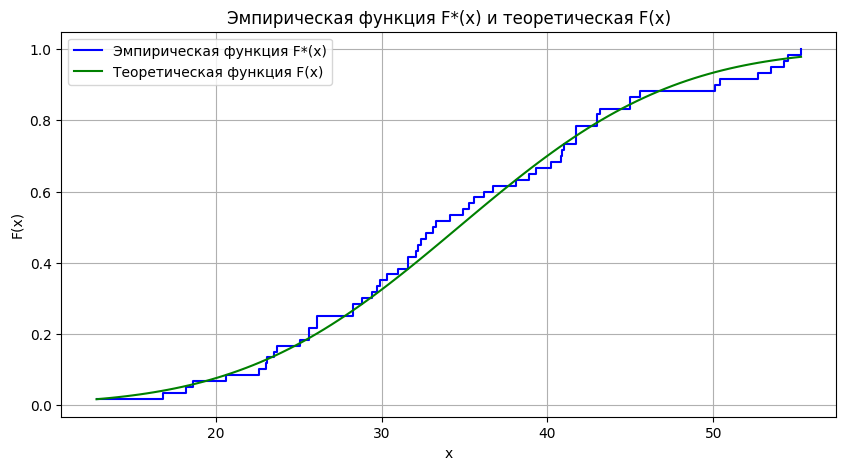

In [11]:
# Пункт 8: Построение теоретических f(x) и F(x) на фоне гистограммы и эмпирической функции

x_vals = np.linspace(min(variation_list), max(variation_list), 100)
f_x = stats.norm.pdf(x_vals, loc=mu, scale=sigma)  # f(x)

F_x = stats.norm.cdf(x_vals, loc=mu, scale=sigma)  # F(x)

plt.figure(figsize=(10, 5))
plt.bar(bin_centers, relative_frequencies, width=(bin_edges[1] - bin_edges[0]) * 0.9,
        align='center', edgecolor='black', label='Гистограмма')
plt.plot(x_vals, f_x, color='red', label='Теоретическая плотность f(x)')
plt.title('Гистограмма и теоретическая плотность f(x)')
plt.xlabel('x')
plt.ylabel('Относительная частота / Плотность')
plt.grid(True)
plt.legend()
plt.show()

# Построим эмпирическую функцию и F(x)
plt.figure(figsize=(10, 5))
plt.step(variation_list, empirical_cdf, where='post', label='Эмпирическая функция F*(x)', color='blue')
plt.plot(x_vals, F_x, color='green', label='Теоретическая функция F(x)')
plt.title('Эмпирическая функция F*(x) и теоретическая F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()
plt.show()


In [14]:
# Пункт 9. Правило "трёх сигма"

lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma

# Считаем, сколько значений попало в диапазон
within_3sigma = [x for x in variation_list if lower_bound <= x <= upper_bound]
percentage_within_3sigma = len(within_3sigma) / n * 100

# Результаты
three_sigma_results = {
    "Нижняя граница": lower_bound,
    "Верхняя граница": upper_bound,
    "Количество значений в пределах трёх сигма": len(within_3sigma),
    "Процент значений в пределах трёх сигма": round(percentage_within_3sigma, 2)
}

sigma_df = pd.DataFrame(three_sigma_results.items(), columns=["Показатель", "Значение"])
sigma_df

,Показатель,Значение
0,Нижняя граница,4.078714
1,Верхняя граница,65.214619
2,Количество значений в пределах трёх сигма,60.000000
3,Процент значений в пределах трёх сигма,100.000000


In [20]:
# Пункт 10. 

expected_frequencies = [
    stats.norm.cdf(bin_edges[i + 1], loc=mu, scale=sigma) - 
    stats.norm.cdf(bin_edges[i], loc=mu, scale=sigma)
    for i in range(k)
]

ni = frequencies
npi = expected_frequencies * n
diff_squared = (ni - npi) ** 2
chi2_parts = diff_squared / npi

interval_labels_pretty = [f"{round(bin_edges[i], 1)} - {round(bin_edges[i+1], 1)}" for i in range(k)]

chi2_full_table = pd.DataFrame({
    "Интервал": interval_labels_pretty,
    "ni (наблюдаемая частота)": ni,
    "npi (ожидаемая частота)": np.round(npi, 2),
    "(ni - npi)^2": np.round(diff_squared, 4),
    "((ni - npi)^2)/npi": np.round(chi2_parts, 4)
})

chi2_full_table.loc["Сумма"] = [
    "Сумма",
    np.sum(ni),
    np.round(np.sum(npi), 2),
    np.round(np.sum(diff_squared), 4),
    np.round(np.sum(chi2_parts), 4)
]

chi2_full_table

ValueError: operands could not be broadcast together with shapes (7,) (420,) 